# Import Libraries

In [15]:
import torch
from craft_text_detector import Craft
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

# Load Model

In [17]:
craf = Craft( crop_type="poly", cuda=True)

c:\Users\Ghost\anaconda3\envs\galli_maps\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Ghost\anaconda3\envs\galli_maps\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


# Fix orientation

In [25]:
def order_contour_clockwise(contour):
    # Calculate the centroid of the contour
    M = cv2.moments(contour)
    cx = int(M["m10"] / M["m00"])
    cy = int(M["m01"] / M["m00"])
    
    # Calculate the angle of each point with respect to the centroid
    def angle_key(point):
        x, y = point
        # print(np.degrees(np.arctan2(y - cy, x - cx)))
        return np.arctan2(y - cy, x - cx)

    
    # Sort the contour points based on the angle with respect to centroid
    sorted_contour = sorted(contour, key=angle_key, reverse = False)  # Clockwise
    
    return np.array(sorted_contour)

def order_contour_anti_clockwise(contour):
    # Calculate the centroid of the contour
    M = cv2.moments(contour)
    cx = int(M["m10"] / M["m00"])
    cy = int(M["m01"] / M["m00"])
    
    # Calculate the angle of each point with respect to the centroid
    def angle_key(point):
        x, y = point
        # print(np.degrees(np.arctan2(y - cy, x - cx)))
        return np.arctan2(y - cy, x - cx)

    
    # Sort the contour points based on the angle with respect to centroid
    sorted_contour = sorted(contour, key=angle_key)  # Clockwise
    
    return np.array(sorted_contour)

# Test orientation

In [26]:
def orientation(contour):
    new_contour = order_contour_clockwise(contour)
    # print(new_contour)
    if np.array_equal(new_contour, contour):
        return 0
    else:
        return 1

[[ 60  86]
 [137  62]
 [144  84]
 [ 67 108]]
[[137  62]
 [144  84]
 [ 67 108]
 [ 60  86]]
counter_clockwise
ag : 72.6883544921875
angle: -17.31164610884658


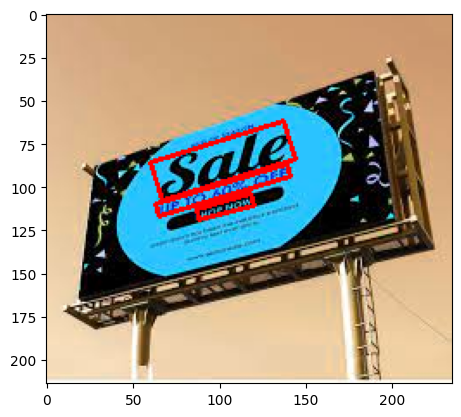

In [43]:
img = cv2.imread('images/testss.jpg')
image = img.copy()
boxes = craft.detect_text(img)['boxes']
imgc = img.copy()

angled_boxes = []
for box in boxes:
    if len(box) >= 3:
        # Convert box points to numpy array for easier manipulation
        box_points = np.array(box, dtype=np.int32).reshape(-1, 2)

        # Calculate the centroid of the polygon
        centroid = np.mean(box_points, axis=0)

        # Calculate angles from the centroid to the vertices
        angles = [math.atan2(p[1] - centroid[1], p[0] - centroid[0]) for p in box_points]

        # Calculate average angle
        avg_angle = sum(angles) / len(angles)

        # Determine the threshold based on your specific case
        threshold = math.pi / 4  # 45 degrees

        # Compare the average angle with the threshold to determine orientation
        is_clockwise = avg_angle > threshold

        # If clockwise, reverse the points
        if is_clockwise:
            box_points = box_points[::-1]

        # Calculate the minimum bounding rectangle
        rotated_rect = cv2.minAreaRect(box_points)
        box_vertices = cv2.boxPoints(rotated_rect)
        box_vertices = np.int0(box_vertices)
        angled_boxes.append(box_vertices)

        # Draw the rotated rectangle
        cv2.drawContours(img, [box_vertices], 0, (255, 0, 0), 2)

plt.imshow(img)

largest_contour = max(angled_boxes, key=cv2.contourArea)
print(largest_contour)
counter_clockwise = orientation(largest_contour)

if counter_clockwise:
    # Calculate the angle for counterclockwise orientation
    largest_contour = order_contour_anti_clockwise(largest_contour)
    print(largest_contour)
    print('counter_clockwise')
    orientation(largest_contour)

    _,_,angle = cv2.minAreaRect(largest_contour)
    print(f'ag : {angle}')
    # if angle < -45:
    #     print('here')
    #     x1, y1 = largest_contour[1]
    #     x2, y2 = largest_contour[0]
    #     if x2 - x1 != 0:
    #         slope = (y2 - y1) / (x2 - x1)
    #         angle_radians = np.arctan(slope)
    #         angle = np.degrees(angle_radians)
    #     else:
    #         angle = 90
    if angle > 45:
        # angle = angle -  90

        x1, y1 = largest_contour[3]
        x2, y2 = largest_contour[0]
        if x2 - x1 != 0:
            slope = (y2 - y1) / (x2 - x1)
            angle_radians = np.arctan(slope)
            angle = np.degrees(angle_radians)
        else:
            angle = 90
else:
    print('clockwise')
    # Calculate the angle for clockwise orientation
    largest_contour = order_contour_clockwise(largest_contour)
    print(largest_contour)
    _,_,angle = cv2.minAreaRect(largest_contour)
    print(f'before {angle}')
    if angle > 45:
        print('here')
        # angle = angle -  90

        x1, y1 = largest_contour[3]
        x2, y2 = largest_contour[0]
        if x2 - x1 != 0:
            slope = (y2 - y1) / (x2 - x1)
            angle_radians = np.arctan(slope)
            angle = np.degrees(angle_radians)
        else:
            angle = 90
    if angle < 45:
        # angle = angle -  90

        x1, y1 = largest_contour[3]
        x2, y2 = largest_contour[0]
        if x2 - x1 != 0:
            slope = (y2 - y1) / (x2 - x1)
            angle_radians = np.arctan(slope)
            angle = np.degrees(angle_radians)
        else:
            angle = 90
    # x1, y1 = largest_contour[3]
    # x2, y2 = largest_contour[0]
    # if x2 - x1 != 0:
    #     slope = (y2 - y1) / (x2 - x1)
    #     angle_radians = np.arctan(slope)
    #     angle = np.degrees(angle_radians)
    # else:
    #     angle = 90

print(f'angle: {angle}')
# print(f'angle_degrees : {angle_degrees}')

height, width = img.shape[:2]
center = (width // 2, height // 2)
imgc = cv2.drawContours(imgc,[largest_contour],0,(0,255,0),2)
if angle != 90:
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale=1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
else:
    rotated_image = image.copy()

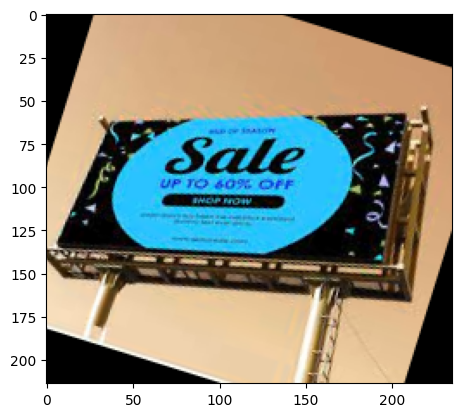

In [44]:
plt.imshow(rotated_image)
plt.show()